In [44]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn_pandas import DataFrameMapper

#temp
import warnings
warnings.filterwarnings(action='ignore')

def ipInt(ip):
  ipInt = ''
  for i in ip.split('.'):
    ipInt += i
  return int(ipInt)

columns = ["IP source", "IP destiny", "L2 protocol", "Source port", "Destiny port", "Package size"]

X_train = pd.read_csv("IP_DataFrame.csv", index_col = 0)
X_train["L2 protocol"] = X_train["L2 protocol"].astype("category")

X_test = pd.DataFrame([[ipInt('192.30.253.34'), ipInt('10.10.10.10'), 'tcp', 20, 80, 54], [ipInt('192.30.253.36'), ipInt('10.10.10.10'), 'tcp', 20, 80, 54]], columns=columns)
X_test["L2 protocol"] = X_test["L2 protocol"].astype("category")

In [45]:
mapper = DataFrameMapper([(["IP source", "IP destiny"], preprocessing.StandardScaler()),
                          ("L2 protocol", preprocessing.LabelBinarizer()),
                          (["Source port", "Destiny port", "Package size"], preprocessing.StandardScaler())
                         ])

mapper.fit(X_train.copy())

DataFrameMapper(default=False, df_out=False,
        features=[(['IP source', 'IP destiny'], StandardScaler(copy=True, with_mean=True, with_std=True)), ('L2 protocol', LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)), (['Source port', 'Destiny port', 'Package size'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)

In [119]:
from sklearn import svm
clf = svm.OneClassSVM()
clf.fit(mapper.transform(X_train))

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [125]:
clf.predict(mapper.transform(X_train))


array([ 1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1])

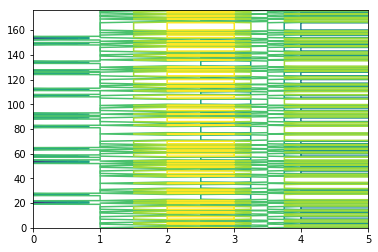

In [123]:
import matplotlib.pyplot as plt
plt.contour(X)
#plt.axis([0, 5, 15, 30])
plt.show()